In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [238]:
binary = pd.CategoricalDtype(categories=[0, 1])
df = pd.read_csv(
    'processed.cleveland.data',
    header=None,
    na_values='?',
    names='age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target'.split(', '),
    dtype={
        'sex':binary,
        'cp':pd.CategoricalDtype(categories=range(1,5)),
        'fbs':binary,
        'restecg':pd.CategoricalDtype(categories=range(3)),
        'exang':binary,
        'slope':pd.CategoricalDtype(categories=range(1,4)),
        'ca':pd.CategoricalDtype(categories=range(4)),
        'thal':pd.CategoricalDtype(categories=[3,6,7]),
        'target':pd.CategoricalDtype(categories=range(2), ordered=True),
    }
)

In [239]:
df.target.value_counts()

0    164
1     55
Name: target, dtype: int64

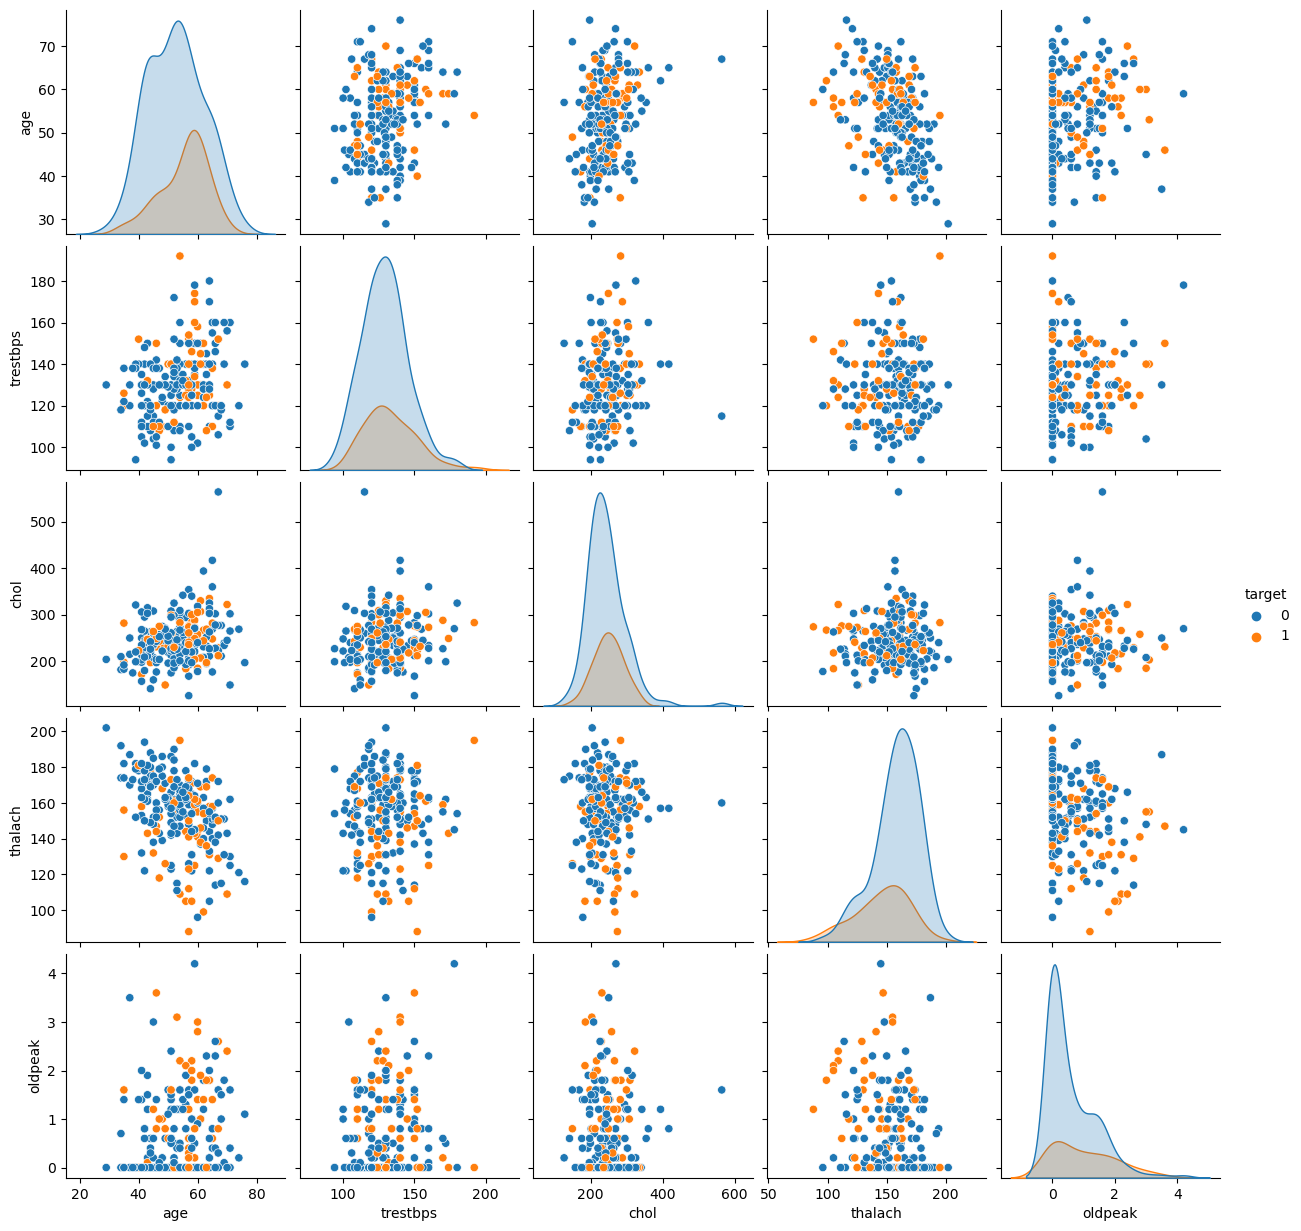

In [172]:
sns.pairplot(df,hue='target')
plt.show()

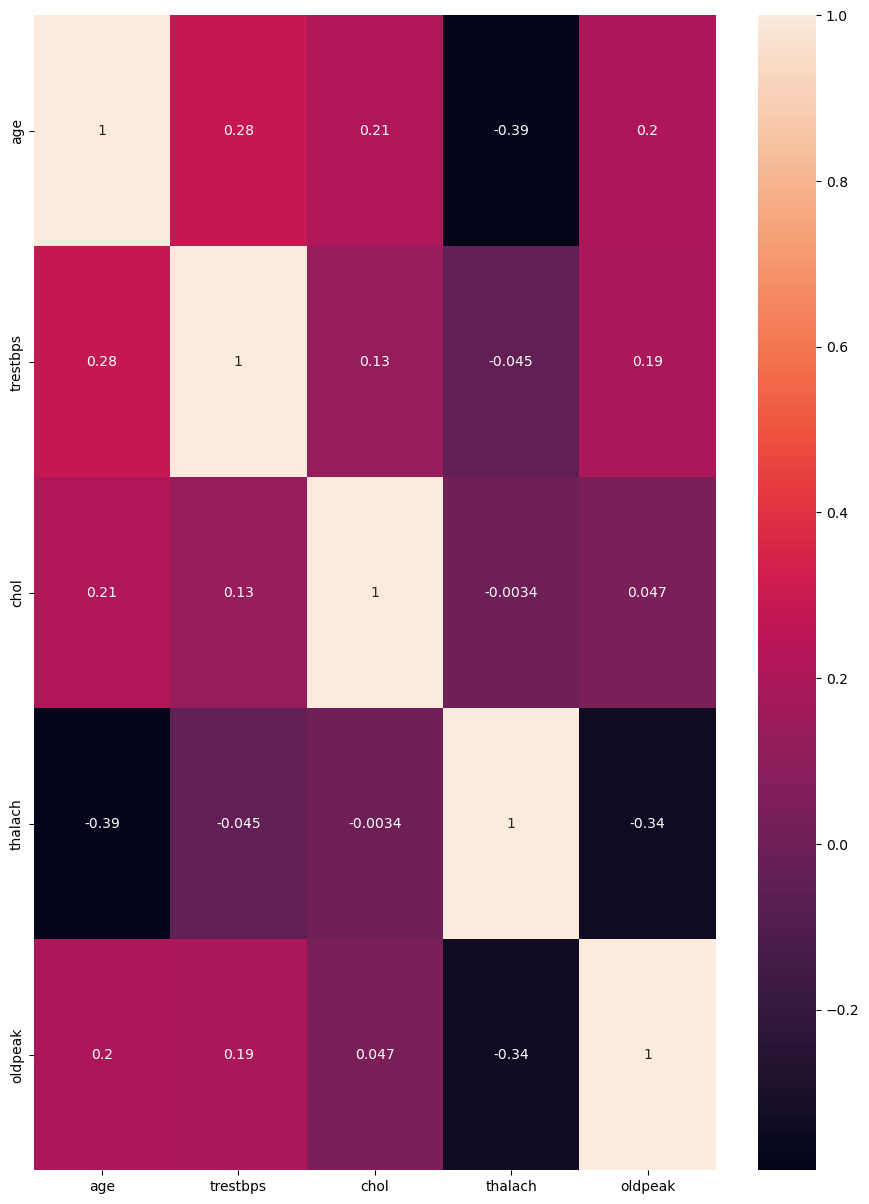

In [75]:
f, ax = plt.subplots(figsize=(11, 15))
heatmap = sns.heatmap(df.corr(),annot=True)

## Preprocessing data

In [240]:
s =df.drop(['target'],axis=1).dtypes == 'category'
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',len(object_cols))

Categorical variables:
['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
No. of. categorical features:  8


In [241]:

df1 = pd.get_dummies(df, columns = object_cols)
df1

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_1,cp_2,...,slope_1,slope_2,slope_3,ca_0,ca_1,ca_2,ca_3,thal_3,thal_6,thal_7
0,63.0,145.0,233.0,150.0,2.3,0,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
1,67.0,160.0,286.0,108.0,1.5,NaN,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
2,67.0,120.0,229.0,129.0,2.6,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,37.0,130.0,250.0,187.0,3.5,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
4,41.0,130.0,204.0,172.0,1.4,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,110.0,264.0,132.0,1.2,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
299,68.0,144.0,193.0,141.0,3.4,NaN,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
300,57.0,130.0,131.0,115.0,1.2,NaN,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
301,57.0,130.0,236.0,174.0,0.0,1,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0


## Filling Missing values

In [242]:
df1=df.fillna({'ca':0, 'thal':3, 'target':1})

In [243]:
df1.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [244]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_learning_curves
from sklearn.model_selection import cross_val_score

## Splitting the dataset into the Training set and Test set

In [245]:
X = df1.drop(['target'],axis=1).values
y = df1['target'].values
y

[0, 1, 1, 0, 0, ..., 1, 1, 1, 1, 0]
Length: 303
Categories (2, int64): [0 < 1]

In [246]:
from sklearn.model_selection import train_test_split

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [248]:
def Show(model):
    
    print(classification_report(y_test, Y_pred))
    accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
    acc_gaussian = round(model.score(X_train, y_train) * 100, 2)

    cm = confusion_matrix(y_test, Y_pred)
    accuracy = accuracy_score(y_test,Y_pred)
    print('Confusion matrix \n',cm)
    print('accuracy: %.3f' %accuracy)
    
def table(model):
    test_score = accuracy_score(y_test, model.predict(X_test)) * 100
    train_score = accuracy_score(y_train, model.predict(X_train)) * 100

    results_df = pd.DataFrame(data=[[model[1], train_score, test_score]], 
                              columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
    print(results_df)



## LogisticRegression

In [249]:
from sklearn.linear_model import LogisticRegression

In [250]:
logistic = make_pipeline(preprocessing.StandardScaler(),LogisticRegression())
logistic.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [251]:
Y_pred = logistic.predict(X_test) 

In [252]:
Show(logistic)

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        33
           1       0.91      0.71      0.80        28

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61

Confusion matrix 
 [[31  2]
 [ 8 20]]
accuracy: 0.836


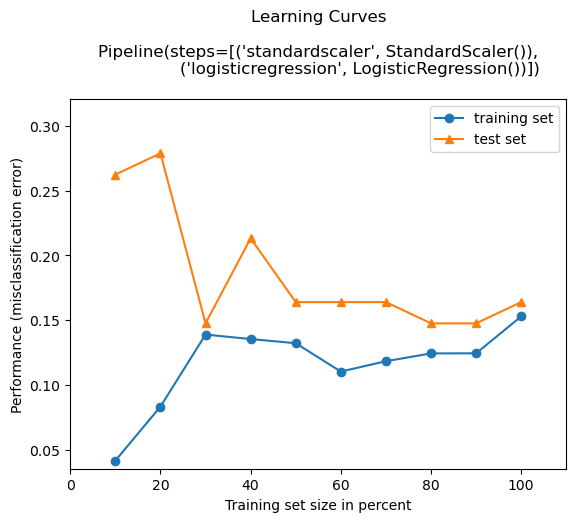

In [294]:
plot_learning_curves(X_train, y_train, X_test, y_test, logistic)
plt.show()

In [253]:
table(logistic)


                  Model  Training Accuracy %  Testing Accuracy %
0  LogisticRegression()            84.710744           83.606557


## SVM

In [254]:
from sklearn.svm import SVC

In [255]:
svc = make_pipeline(preprocessing.StandardScaler(),SVC(kernel='rbf'))
svc.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [256]:
Y_pred = svc.predict(X_test) 

In [257]:
Show(svc)

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        33
           1       0.92      0.79      0.85        28

    accuracy                           0.87        61
   macro avg       0.88      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61

Confusion matrix 
 [[31  2]
 [ 6 22]]
accuracy: 0.869


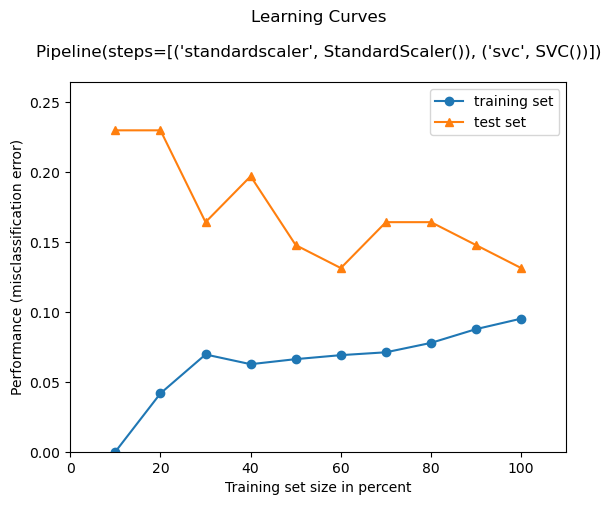

In [293]:
plot_learning_curves(X_train, y_train, X_test, y_test, svc)
plt.show()

In [258]:
table(svc)

   Model  Training Accuracy %  Testing Accuracy %
0  SVC()            90.495868           86.885246


In [259]:
svc_p = make_pipeline(preprocessing.StandardScaler(),SVC(kernel='poly'))
svc_p.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='poly'))])

In [260]:
Y_pred = svc_p.predict(X_test) 

In [261]:
Show(svc_p)

              precision    recall  f1-score   support

           0       0.79      0.91      0.85        33
           1       0.87      0.71      0.78        28

    accuracy                           0.82        61
   macro avg       0.83      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61

Confusion matrix 
 [[30  3]
 [ 8 20]]
accuracy: 0.820


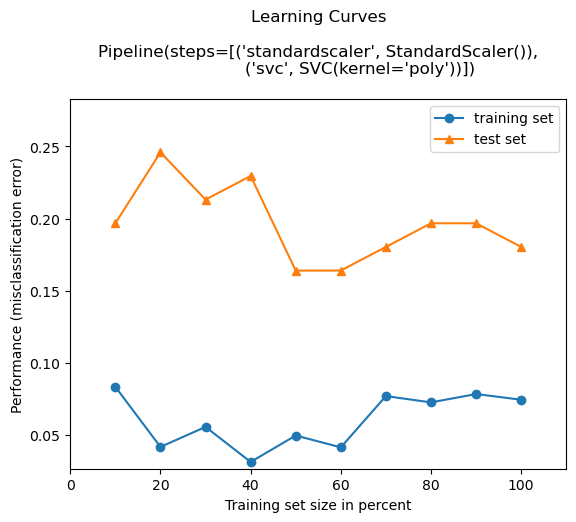

In [292]:
plot_learning_curves(X_train, y_train, X_test, y_test, svc_p)
plt.show()

In [262]:
table(svc_p)

                Model  Training Accuracy %  Testing Accuracy %
0  SVC(kernel='poly')            92.561983           81.967213


In [263]:
svc_l = make_pipeline(preprocessing.StandardScaler(),SVC(kernel='linear'))
svc_l.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

In [264]:
Y_pred = svc_l.predict(X_test) 

In [265]:
Show(svc_l)

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        33
           1       0.91      0.71      0.80        28

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61

Confusion matrix 
 [[31  2]
 [ 8 20]]
accuracy: 0.836


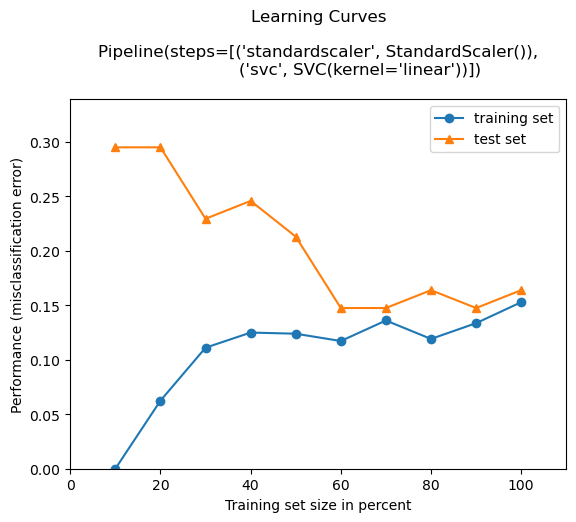

In [291]:
plot_learning_curves(X_train, y_train, X_test, y_test, svc_l)
plt.show()

In [266]:
table(svc_l)

                  Model  Training Accuracy %  Testing Accuracy %
0  SVC(kernel='linear')            84.710744           83.606557


## Navie bayes

In [267]:
gaussian = make_pipeline(preprocessing.StandardScaler(),GaussianNB())
gaussian.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])

In [268]:
Y_pred = gaussian.predict(X_test) 

In [269]:
Show(gaussian)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        33
           1       0.86      0.86      0.86        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Confusion matrix 
 [[29  4]
 [ 4 24]]
accuracy: 0.869


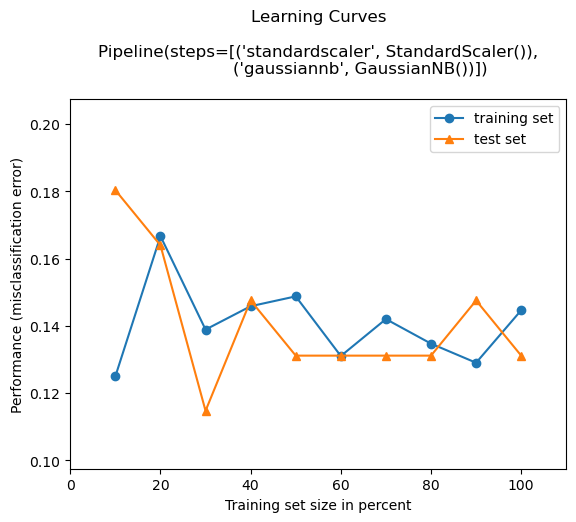

In [290]:
plot_learning_curves(X_train, y_train, X_test, y_test, gaussian)
plt.show()

In [270]:
table(gaussian)

          Model  Training Accuracy %  Testing Accuracy %
0  GaussianNB()             85.53719           86.885246


## KNeighborsClassifier

In [271]:
from sklearn.neighbors import KNeighborsClassifier

In [272]:
k= make_pipeline(preprocessing.StandardScaler(),KNeighborsClassifier())
k.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [273]:
Y_pred = k.predict(X_test) 

In [274]:
Show(k)

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        33
           1       0.96      0.79      0.86        28

    accuracy                           0.89        61
   macro avg       0.90      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61

Confusion matrix 
 [[32  1]
 [ 6 22]]
accuracy: 0.885


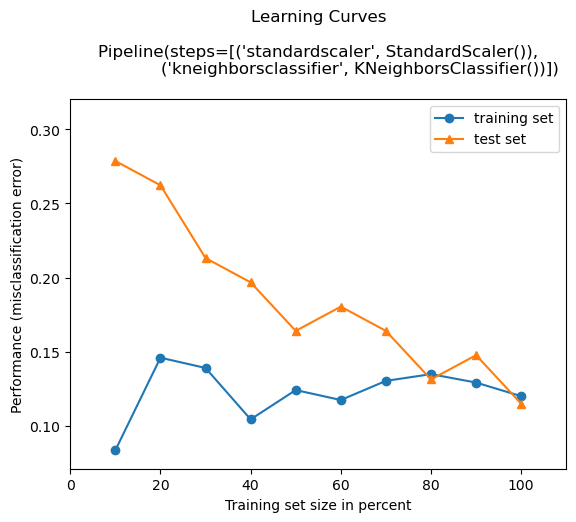

In [287]:
plot_learning_curves(X_train, y_train, X_test, y_test, k)
plt.show()

In [275]:
table(k)

                    Model  Training Accuracy %  Testing Accuracy %
0  KNeighborsClassifier()            88.016529            88.52459


## Random Forest

In [276]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

In [277]:
random= make_pipeline(preprocessing.StandardScaler(), RandomForestClassifier())
random.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [278]:
Y_pred = random.predict(X_test) 

In [279]:
Show(random)

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        33
           1       0.96      0.79      0.86        28

    accuracy                           0.89        61
   macro avg       0.90      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61

Confusion matrix 
 [[32  1]
 [ 6 22]]
accuracy: 0.885


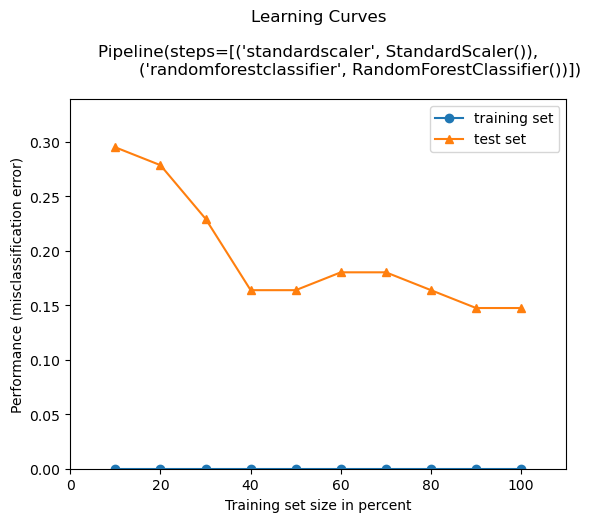

In [288]:
plot_learning_curves(X_train, y_train, X_test, y_test, random)
plt.show()

In [280]:
table(random)

                                               Model  Training Accuracy %  \
0  (DecisionTreeClassifier(max_features='sqrt', r...                100.0   

   Testing Accuracy %  
0            88.52459  


## Adaboost

In [281]:
ada= make_pipeline(preprocessing.StandardScaler(), AdaBoostClassifier())
ada.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier', AdaBoostClassifier())])

In [282]:
Y_pred = ada.predict(X_test) 

In [283]:
Show(ada)

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        33
           1       0.92      0.82      0.87        28

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61

Confusion matrix 
 [[31  2]
 [ 5 23]]
accuracy: 0.885


In [284]:
table(ada)

                                               Model  Training Accuracy %  \
0  (DecisionTreeClassifier(max_depth=1, random_st...            92.975207   

   Testing Accuracy %  
0            88.52459  


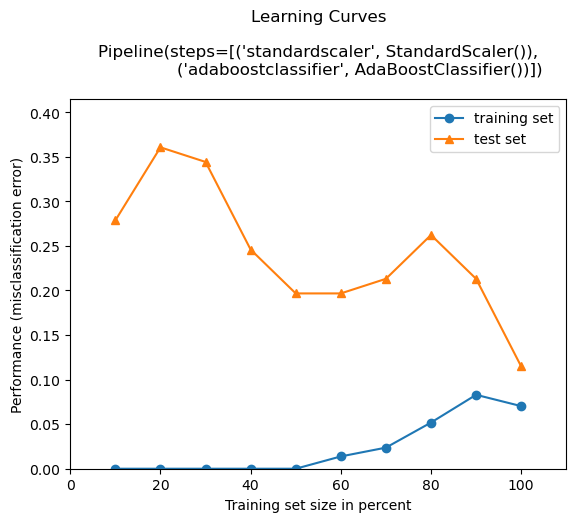

In [289]:
plot_learning_curves(X_train, y_train, X_test, y_test, ada)
plt.show()

# Final result

In [285]:
table(logistic)
print()
table(svc)
print()
table(svc_p)
print()
table(svc_l)
print()
table(k)
print()
table(random)
print()
table(gaussian)
print()
table(ada)

                  Model  Training Accuracy %  Testing Accuracy %
0  LogisticRegression()            84.710744           83.606557

   Model  Training Accuracy %  Testing Accuracy %
0  SVC()            90.495868           86.885246

                Model  Training Accuracy %  Testing Accuracy %
0  SVC(kernel='poly')            92.561983           81.967213

                  Model  Training Accuracy %  Testing Accuracy %
0  SVC(kernel='linear')            84.710744           83.606557

                    Model  Training Accuracy %  Testing Accuracy %
0  KNeighborsClassifier()            88.016529            88.52459

                                               Model  Training Accuracy %  \
0  (DecisionTreeClassifier(max_features='sqrt', r...                100.0   

   Testing Accuracy %  
0            88.52459  

          Model  Training Accuracy %  Testing Accuracy %
0  GaussianNB()             85.53719           86.885246

                                               Model  Tr

Kneighbers:در این مدل اختلاف بین ترین و تست بسیار ناچیز است و هرچه این اختلاف کمتر باشد درصد اور فیت شدن مدل بسیار کم است و از طرفی هم دقت مدل حدود ۸۸ درصد است که درصد نسبتا خوبی برای تشخیص بیماری است



در بین مدل های دیگر درخت تصمیم دارای درصد ترین ۱۰۰ میباشد و درصد تست آن حدود ۸۵ درصد است که یعنی مدل در فاز ترین بسیار خوب عمل کرده ولی در فاز تست این طور نیست و مدل دچار اورفیت شده است و نمیتوان از آن برای تشخیص درست استفاده کرد

# Cross Validation 

در اینجا بهترین هایپر پارامتر های مربوط به مدل اس وی ام و لاجستیک را بررسی شده است

In [106]:
from sklearn import model_selection

## SVM

In [223]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [224]:
svc=SVC()
parameters = {  'C':[0.01, 1, 5],
                'kernel':('linear', 'rbf'),
                'gamma':[0.01,0.02,0.03,0.04,0.05]
             }

In [225]:
grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 2,
                           verbose=0)


grid_search.fit(X_train, y_train)


GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.01, 1, 5],
                         'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                         'kernel': ('linear', 'rbf')},
             scoring='accuracy')

In [226]:
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))



GridSearch CV best score : 0.8223


Parameters that give the best results : 

 {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}


## Logistic regression

In [95]:
from sklearn.model_selection import StratifiedKFold

In [96]:
log_reg_grid = {"C": np.logspace(-4, 4, 50),
                "max_iter": np.arange(1000, 5000, 500),
                "solver": ['liblinear'],
                "penalty": ['l1', 'l2']}

In [97]:
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=StratifiedKFold(),
                          verbose=True,
                          n_jobs=-1)

In [98]:
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


In [99]:
gs_log_reg.best_params_

{'C': 0.12648552168552957,
 'max_iter': 1000,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [100]:
gs_log_reg.score(X_test, y_test)

0.8524590163934426

## The 10-fold cross validation 

در این قسمت به بررسی دقت مدل ها پرداخته شده است

LR: 0.822833 (0.059517)
KNN: 0.822500 (0.090910)
random: 0.830500 (0.070962)
NB: 0.839333 (0.079702)
SVM_RBF: 0.628500 (0.069376)
SVM_Linear: 0.822667 (0.060499)
SVM_poly: 0.822667 (0.073459)
adaboost: 0.794333 (0.101804)


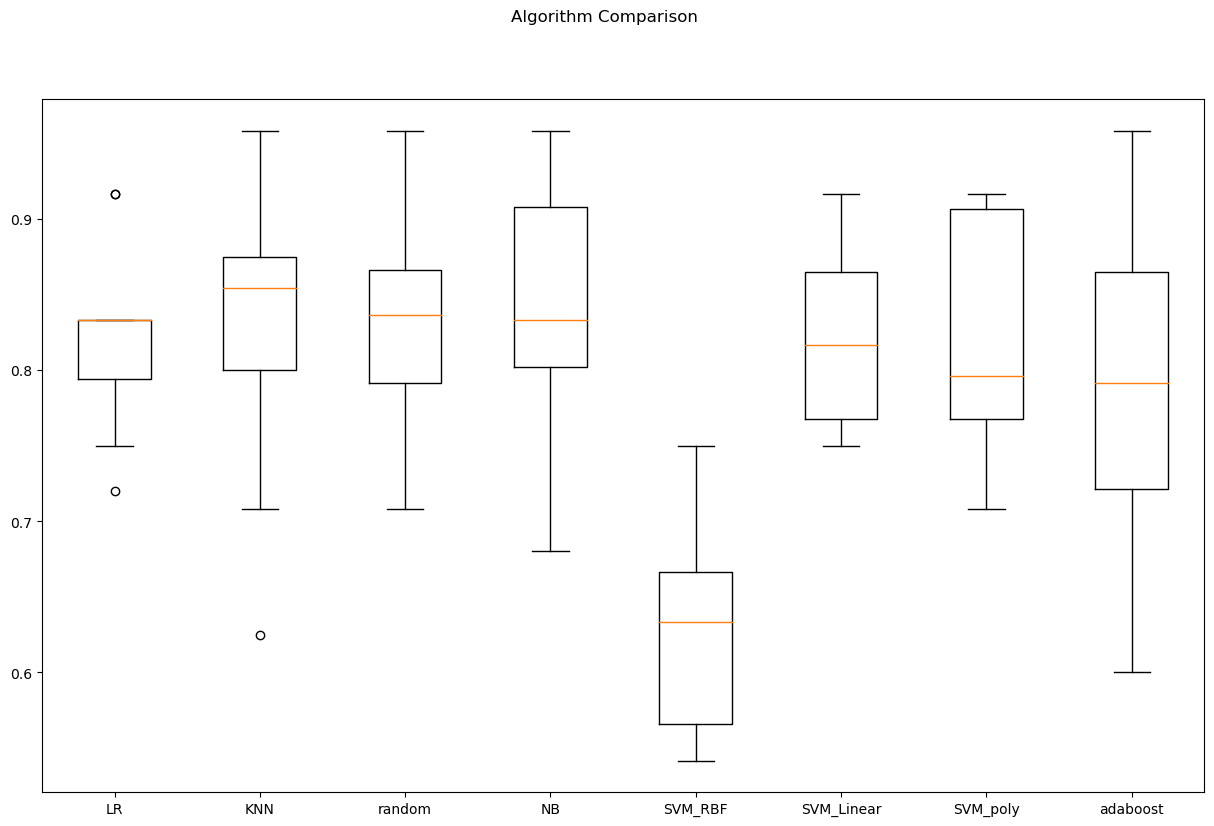

In [126]:
models = []
models.append(('LR', logistic))
models.append(('KNN', k))
models.append(('random', random))
models.append(('NB', gaussian))
models.append(('SVM_RBF', svc))
models.append(('SVM_Linear', svc_l))
models.append(('SVM_poly', svc_p))
models.append(('adaboost', AdaBoostClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
     kfold = model_selection.KFold(n_splits=10)
     cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
     results.append(cv_results)
     names.append(name)
     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
     print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,9))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()